In [1]:
pip install "https://github.com/z-mahmud22/Dlib_Windows_Python3.x/raw/main/dlib-19.24.99-cp312-cp312-win_amd64.whl"

  Using cached https://github.com/z-mahmud22/Dlib_Windows_Python3.x/raw/main/dlib-19.24.99-cp312-cp312-win_amd64.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import dlib
import matplotlib.pyplot as plt

#Phát hiện khuôn mặt và xác định các điểm đặc trưng trên khuôn mặt sử dụng thư viện dlib trong Python
detector = dlib.get_frontal_face_detector() #tạo ra 1 đối tượng phát hiện khuôn mặt. Dlib sử dụng một bộ phát hiện khuôn mặt (face detector) để xác định vị trí khuôn mặt trong ảnh. Hàm này tải bộ phát hiện khuôn mặt từ Dlib.
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') #tạo ra 1 đối tượng dự đoán cho việc phát hiện các điểm đặc trưng trên khuôn mặt. Sau khi phát hiện khuôn mặt, để xác định vị trí chính xác của các đặc điểm như mắt, mũi, miệng, và cằm, ta sử dụng bộ dự đoán (predictor) dựa trên 68 điểm mốc (68 facial landmarks).

def extract_eye_region(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #chuyển ảnh sang thang độ xám
    faces = detector(gray) #detector là một bộ phát hiện khuôn mặt (face detector) được khởi tạo từ Dlib hoặc một thư viện khác, có nhiệm vụ phát hiện khuôn mặt trong ảnh thang độ xám. Kết quả là danh sách các khuôn mặt (tọa độ) được phát hiện trong ảnh.

    eye_regions = []
    for face in faces:
        landmarks = predictor(gray, face)

        left_eye = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)] #Tọa độ mắt trái từ điểm 36 đến 41
        right_eye = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)] #Tọa độ mắt phải từ điểm 42 đến 47

        # Xác định 1 hình chữ nhật (bouding box) bao quanh khu vực mắt là 1 list có dạng [x1, y1, x2, y2]
        left_eye_bb = [min([p[0] for p in left_eye]), min([p[1] for p in left_eye]),
                       max([p[0] for p in left_eye]), max([p[1] for p in left_eye])]

        right_eye_bb = [min([p[0] for p in right_eye]), min([p[1] for p in right_eye]),
                        max([p[0] for p in right_eye]), max([p[1] for p in right_eye])]

        # Cắt ảnh vùng mắt theo chiều ngang từ x1 -> x2, chiều dọc từ y1 -> y2
        left_eye_img = gray[left_eye_bb[1]:left_eye_bb[3], left_eye_bb[0]:left_eye_bb[2]]
        right_eye_img = gray[right_eye_bb[1]:right_eye_bb[3], right_eye_bb[0]:right_eye_bb[2]]

        cv2.rectangle(image, (left_eye_bb[0], left_eye_bb[1]), (left_eye_bb[2], left_eye_bb[3]), (0, 255, 0), 2)
        cv2.rectangle(image, (right_eye_bb[0], right_eye_bb[1]), (right_eye_bb[2], right_eye_bb[3]), (0, 255, 0), 2)

        #Thêm ảnh mắt trái và phải vào list eye_regions
        eye_regions.append((left_eye_img, right_eye_img))

    return eye_regions

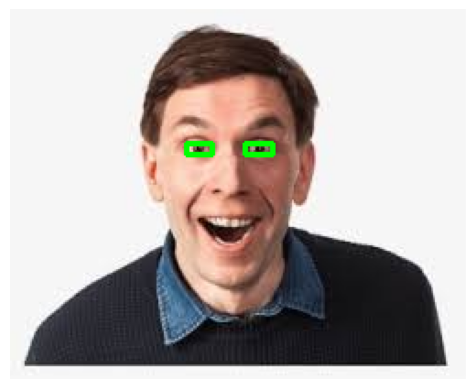

In [5]:
test_img = cv2.imread("test_img.jfif")
extract_eye_region(test_img)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [6]:
#Trích xuất dữ liệu
closedLeftEyes = "closedLeftEyes"
closedRightEyes = "closedRightEyes"
openLeftEyes = "openLeftEyes"
openRightEyes = "openRightEyes"

Vì đây là 4 thư mục bên trong chứa rất nhiều dữ liệu ảnh về mắt người nên ta cần liệt kê tất cả các tệp có trong thư mục và tạo thành 1 path bằng cách sử dụng thư viện os:
- os.listdir(folder): liệt kê các tệp có trong thư mục
- os.path.join(folder, img_name): tạo ra 1 đường dẫn (path) giữa folder và tên của từng ảnh đã được liệt kê

In [7]:
import os
import numpy as np

data = [] #mảng để lưu ảnh
labels = [] #mảng để lưu nhãn của ảnh (0 hoặc 1)

def load_images_from_folder(folder, label): #tải các hình ảnh từ một thư mục cụ thể và có thể gán nhãn cho chúng
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #load hình ảnh từ đường dẫn img_path và chuyển sang thang độ xám
        img = img.flatten() #chuyển ảnh thành 1 vector (flatten: duỗi)
        data.append(img) #đưa các vector chuyển hóa từ ảnh vào tập data
        labels.append(label) #Thêm nhãn tương ứng (0: mở mắt, 1: nhắm mắt)

# Tải ảnh mắt mở và gán nhãn "0"
load_images_from_folder(openRightEyes, 0)
load_images_from_folder(openLeftEyes, 0)

# Tải ảnh mắt nhắm và gán nhãn "1"
load_images_from_folder(closedRightEyes, 1)
load_images_from_folder(closedLeftEyes, 1)

# Chuyển đổi dữ liệu thành mảng numpy
data = np.array(data)
labels = np.array(labels)

Ta sẽ đưa dữ liệu của ảnh và nhãn của nó vào 1 dataframe để xem

In [30]:
print(len(os.listdir(openRightEyes)))
print(len(os.listdir(openLeftEyes)))
print(len(os.listdir(closedRightEyes)))
print(len(os.listdir(closedLeftEyes)))

import pandas as pd
df = pd.DataFrame(data)
df['label'] = labels
df.head(-1)

1231
1231
1192
1192


,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,label
0,65,68,71,75,79,80,81,81,82,81,...,86,84,85,85,82,76,70,66,64,0
1,209,192,171,154,139,125,117,114,112,120,...,164,159,156,152,144,129,115,110,113,0
2,52,45,36,29,26,27,28,29,35,30,...,59,52,52,59,75,96,107,103,92,0
3,74,59,57,71,75,65,61,67,64,80,...,222,217,210,202,195,187,180,182,187,0
4,136,139,144,145,134,122,121,128,143,149,...,113,124,141,160,160,138,116,117,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,174,173,164,152,150,164,180,188,214,219,...,209,215,214,212,211,210,209,209,209,1
4841,78,82,85,86,86,86,89,90,100,109,...,190,194,193,191,189,188,188,189,190,1
4842,110,106,102,100,99,97,93,89,91,91,...,186,185,184,183,181,179,176,173,172,1
4843,195,182,174,176,179,175,166,160,152,159,...,214,209,212,216,216,214,213,214,216,1


Vì ta đưa dữ liệu vào theo thứ tự từ mở mắt đến nhắm mắt nên dữ liệu trong dataframe phân bố không đồng đều, ta cần trộn vị trí của các mẫu bằng ***df.sample(frac=1).reset_index(drop=True)***

In [47]:
seed_value = 42
df = df.sample(frac=1, random_state=seed_value).reset_index(drop=True)
df.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,label
0,81,87,89,82,67,56,55,58,70,68,...,153,156,151,140,122,104,94,93,96,1
1,167,166,162,158,158,156,143,129,115,111,...,164,167,167,170,174,174,171,172,176,0
2,139,140,134,131,139,152,153,144,148,156,...,157,151,140,134,142,158,170,179,184,0
3,192,194,194,191,184,177,172,170,175,166,...,207,211,207,205,206,208,206,200,194,1
4,187,181,174,170,165,156,143,133,125,119,...,187,190,188,189,194,195,193,193,196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,202,198,194,196,200,201,196,191,184,181,...,212,208,216,205,203,210,187,180,216,1
4841,162,170,183,194,195,184,165,151,127,113,...,174,194,205,207,195,187,194,203,207,1
4842,83,121,131,109,97,100,105,111,116,115,...,157,155,145,142,150,154,150,150,155,0
4843,130,128,123,116,109,103,96,89,81,81,...,177,171,160,150,139,122,113,125,147,1


Vì ảnh đầu vào có kích thước 24x24 nên mỗi ảnh sẽ có 576 feature (vì đã được flatten chuyển thành vector)

Sau đó ta trích xuất dữ liệu để gán cho X và y

In [48]:
X = df.drop(columns='label')
y = df['label']

X.shape, y.shape

((4846, 576), (4846,))

Sử dụng thư viện train_test_split để chia tập dữ liệu thành 80% trainset và 20% tesset

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [51]:
best_accuracy_for_model_KNN = 0.0
best_k_for_model_KNN = 0
# Huấn luyện mô hình KNN
for n_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    # Dự đoán trên tập kiểm tra và đánh giá độ chính xác
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy > best_accuracy_for_model_KNN):
      best_accuracy_for_model_KNN = accuracy
      best_k_for_model = n_neighbors
    print(f"Với k = {n_neighbors}, độ chính xác của mô hình: {accuracy * 100:.2f}%")
knn = KNeighborsClassifier(n_neighbors=best_k_for_model, metric='euclidean')
knn.fit(X_train, y_train)
print(f"K tốt nhất cho model: {best_k_for_model}")
print(f"Độ chính xác tốt nhất: {best_accuracy_for_model_KNN * 100:.2f}%")
recall_score_knn = recall_score(y_test, y_pred)
f1_score_knn = f1_score(y_test, y_pred)
print(f"Recall score: {recall_score_knn}")
print(f"F1-score: {f1_score_knn}")

Với k = 1, độ chính xác của mô hình: 80.10%
Với k = 2, độ chính xác của mô hình: 81.75%
Với k = 3, độ chính xác của mô hình: 81.86%
Với k = 4, độ chính xác của mô hình: 83.51%
Với k = 5, độ chính xác của mô hình: 82.27%
Với k = 6, độ chính xác của mô hình: 83.71%
Với k = 7, độ chính xác của mô hình: 82.06%
Với k = 8, độ chính xác của mô hình: 84.54%
Với k = 9, độ chính xác của mô hình: 82.78%
Với k = 10, độ chính xác của mô hình: 84.23%
Với k = 11, độ chính xác của mô hình: 82.89%
Với k = 12, độ chính xác của mô hình: 83.71%
Với k = 13, độ chính xác của mô hình: 82.37%
Với k = 14, độ chính xác của mô hình: 82.99%
Với k = 15, độ chính xác của mô hình: 81.96%
Với k = 16, độ chính xác của mô hình: 82.68%
Với k = 17, độ chính xác của mô hình: 82.06%
Với k = 18, độ chính xác của mô hình: 83.30%
Với k = 19, độ chính xác của mô hình: 82.37%
K tốt nhất cho model: 8
Độ chính xác tốt nhất: 84.54%
Recall score: 0.9074446680080482
F1-score: 0.8406337371854613


In [52]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Tắt cảnh báo ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#Huấn luyện mô hình Logistic Regression
best_C = 0.0
best_accuracy_for_model_LR = 0.0
Cs = np.linspace(0.1, 2.1, 21)
for C in Cs:
    lr = LogisticRegression(C=C, penalty='l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy > best_accuracy_for_model_LR):
      best_accuracy_for_model_LR = accuracy
      best_C = C
print(f"C tốt nhất cho model: {best_C}")
print(f"Độ chính xác tốt nhất: {best_accuracy_for_model_LR * 100:.2f}%")
lr = LogisticRegression(C=best_C, penalty='l2')
lr.fit(X_train, y_train)
recall_score_lr = recall_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)
print(f"Recall score: {recall_score_lr}")
print(f"F1-score: {f1_score_lr}")

C tốt nhất cho model: 1.8000000000000003
Độ chính xác tốt nhất: 88.35%
Recall score: 0.8712273641851107
F1-score: 0.8747474747474747


In [53]:
#Huấn luyện mô hình Naive Bayes sử Bernoulli áp dụng phân loại nhị phân
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy_NB * 100:.2f}%")
recall_score_nb = recall_score(y_test, y_pred)
f1_score_nb = f1_score(y_test, y_pred)
print(f"Recall score: {recall_score_nb}")
print(f"F1-score: {f1_score_nb}")

Độ chính xác của mô hình: 49.79%
Recall score: 0.026156941649899398
F1-score: 0.050682261208576995


In [54]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy_SVM * 100:.2f}%")
recall_score_svm = recall_score(y_test, y_pred)
f1_score_svm = f1_score(y_test, y_pred)
print(f"Recall score: {recall_score_svm}")
print(f"F1-score: {f1_score_svm}")

Độ chính xác của mô hình: 91.65%
Recall score: 0.937625754527163
F1-score: 0.9200394866732478


In [55]:
# Huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy_DT * 100:.2f}%")
recall_score_dt = recall_score(y_test, y_pred)
f1_score_dt = f1_score(y_test, y_pred)
print(f"Recall score: {recall_score_dt}")
print(f"F1-score: {f1_score_dt}")

Độ chính xác của mô hình: 78.56%
Recall score: 0.7464788732394366
F1-score: 0.7810526315789473


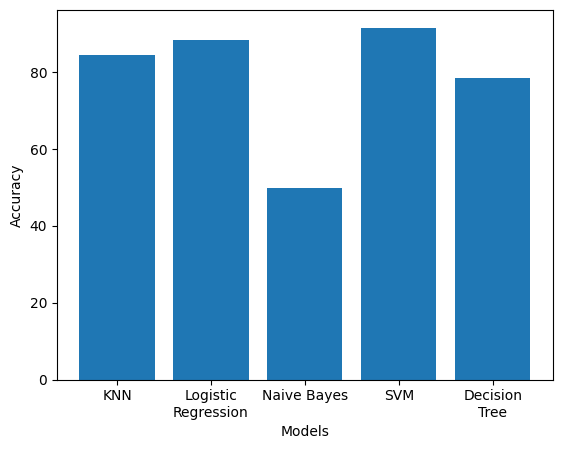

In [57]:
models = ['KNN', 'Logistic\nRegression', 'Naive Bayes', 'SVM', 'Decision\nTree']
accuracy = [best_accuracy_for_model_KNN*100, best_accuracy_for_model_LR*100, accuracy_NB*100, accuracy_SVM*100, accuracy_DT*100]
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

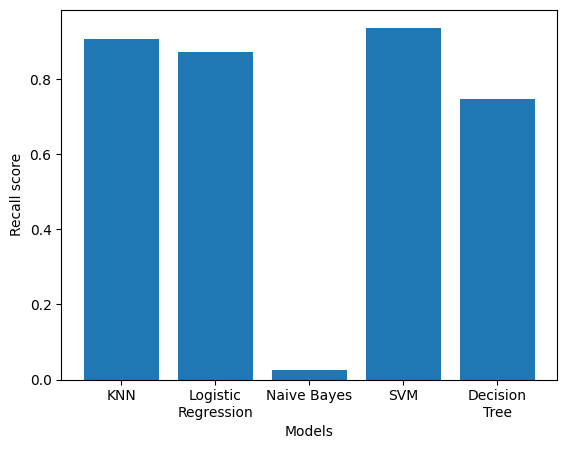

In [58]:
models = ['KNN', 'Logistic\nRegression', 'Naive Bayes', 'SVM', 'Decision\nTree']
recall_score = [recall_score_knn, recall_score_lr, recall_score_nb, recall_score_svm, recall_score_dt]
plt.bar(models, recall_score)
plt.xlabel('Models')
plt.ylabel('Recall score')
plt.show()

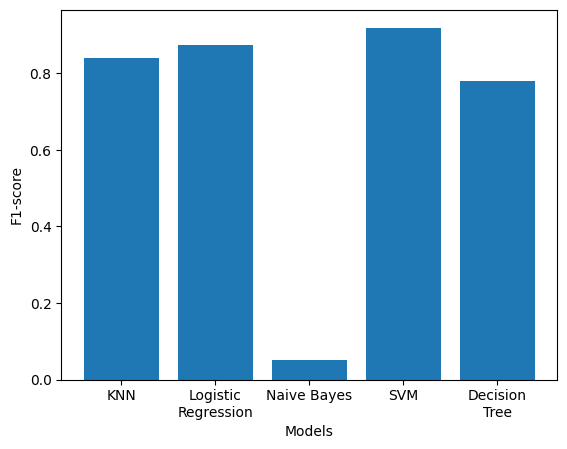

In [59]:
models = ['KNN', 'Logistic\nRegression', 'Naive Bayes', 'SVM', 'Decision\nTree']
f1_score = [f1_score_knn, f1_score_lr, f1_score_nb, f1_score_svm, f1_score_dt]
plt.bar(models, f1_score)
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.show()

In [60]:
# Hàm dự đoán trạng thái mắt (mở hay nhắm)
def predict_sleep(image):
    if image is None:
        return
    eye_regions = extract_eye_region(image)

    for (left_eye, right_eye) in eye_regions:
        left_eye_resized = cv2.resize(left_eye, (24, 24)).flatten().reshape(1, -1)
        right_eye_resized = cv2.resize(right_eye, (24, 24)).flatten().reshape(1, -1)

        left_eye_pred = svm.predict(left_eye_resized)
        right_eye_pred = svm.predict(right_eye_resized)

        if left_eye_pred == 1 and right_eye_pred == 1:
            cv2.putText(image, "Closed Eyes", (50,90),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),10,cv2.LINE_AA)
        else:
            cv2.putText(image, "Open Eyes", (50,90),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),10,cv2.LINE_AA)

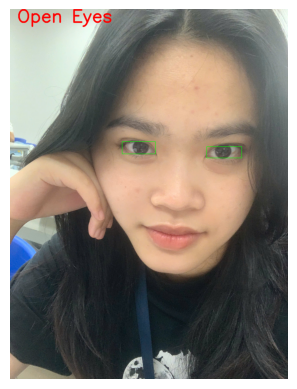

In [61]:
img = cv2.imread("open_eyes_test.jpg")
predict_sleep(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

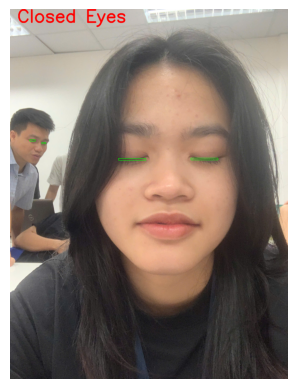

In [62]:
img = cv2.imread("closed_eyes_test.jpg")
predict_sleep(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [63]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    predict_sleep(frame)
    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()